<a href="https://colab.research.google.com/github/vinhpeters/tf-exam/blob/main/02_neural_network_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Intro to neural network classification

## Creating example data

In [1]:
from sklearn.datasets import make_circles
import tensorflow as tf

In [2]:
n_samples = 1000
X ,y = make_circles(n_samples, noise = 0.03, random_state=42)

In [3]:
X, y[:10]

(array([[ 0.75424625,  0.23148074],
        [-0.75615888,  0.15325888],
        [-0.81539193,  0.17328203],
        ...,
        [-0.13690036, -0.81001183],
        [ 0.67036156, -0.76750154],
        [ 0.28105665,  0.96382443]]),
 array([1, 1, 1, 1, 0, 1, 1, 1, 1, 0]))

In [4]:
import pandas as pd


In [5]:
circles = pd.DataFrame({'X0': X[:,0], 'X1':X[:,1], 'label': y})

In [6]:
circles

,X0,X1,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0
...,...,...,...
995,0.244054,0.944125,0
996,-0.978655,-0.272373,0
997,-0.136900,-0.810012,1
998,0.670362,-0.767502,0


In [7]:
import matplotlib.pyplot as plt


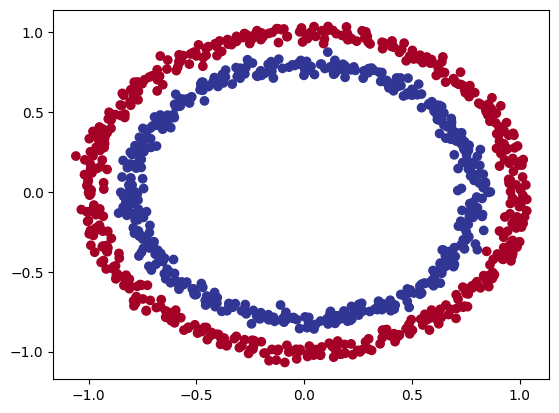

In [8]:
plt.scatter(X[:,0], X[:,1], c = y, cmap=plt.cm.RdYlBu)

## Input and output shapes

In [9]:
X.shape, y.shape

((1000, 2), (1000,))

In [10]:
len(X),len(y)

(1000, 1000)

In [11]:
X[0],y[0]

(array([0.75424625, 0.23148074]), 1)

## Building the model

In [12]:
tf.random.set_seed(42)


In [13]:
model_1 = tf.keras.Sequential([
  tf.keras.layers.Dense(1)
])

model_1.compile(loss=tf.keras.losses.BinaryCrossentropy(), optimizer = tf.keras.optimizers.SGD(), metrics=['accuracy'] )

model_1.fit(X,y, epochs =5)

Epoch 1/5
32/32 [==============================] - 2s 8ms/step - loss: 3.4849 - accuracy: 0.4640
Epoch 2/5
32/32 [==============================] - 1s 16ms/step - loss: 0.7730 - accuracy: 0.5050
Epoch 3/5
32/32 [==============================] - 1s 19ms/step - loss: 0.7166 - accuracy: 0.4960
Epoch 4/5
32/32 [==============================] - 0s 3ms/step - loss: 0.7012 - accuracy: 0.4980
Epoch 5/5
32/32 [==============================] - 0s 5ms/step - loss: 0.6961 - accuracy: 0.4890


In [14]:
# No better than guessing
model_1.fit(X,y, epochs = 200, verbose = 0)
model_1.evaluate(X,y)

32/32 [==============================] - 1s 7ms/step - loss: 0.6935 - accuracy: 0.5000


[0.6934831142425537, 0.5]

In [15]:
tf.random.set_seed(42)
model_2 = tf.keras.Sequential([
  tf.keras.layers.Dense(1),
  tf.keras.layers.Dense(1)
])

model_2.compile(loss=tf.keras.losses.BinaryCrossentropy(), optimizer = tf.keras.optimizers.SGD(), metrics=['accuracy'] )

model_2.fit(X, y, epochs = 100)

Epoch 1/100
32/32 [==============================] - 2s 5ms/step - loss: 6.4144 - accuracy: 0.4970
Epoch 2/100
32/32 [==============================] - 0s 3ms/step - loss: 6.6666 - accuracy: 0.5470
Epoch 3/100
32/32 [==============================] - 0s 2ms/step - loss: 6.6530 - accuracy: 0.5530
Epoch 4/100
32/32 [==============================] - 0s 3ms/step - loss: 6.5241 - accuracy: 0.5580
Epoch 5/100
32/32 [==============================] - 0s 3ms/step - loss: 6.3273 - accuracy: 0.5640
Epoch 6/100
32/32 [==============================] - 0s 4ms/step - loss: 6.0867 - accuracy: 0.5870
Epoch 7/100
32/32 [==============================] - 0s 4ms/step - loss: 6.0772 - accuracy: 0.5880
Epoch 8/100
32/32 [==============================] - 0s 3ms/step - loss: 6.0772 - accuracy: 0.5900
Epoch 9/100
32/32 [==============================] - 0s 3ms/step - loss: 6.0661 - accuracy: 0.5880
Epoch 10/100
32/32 [==============================] - 0s 3ms/step - loss: 6.0669 - accuracy: 0.5900
Epoch 11/

In [16]:
model_2.evaluate(X,y)

32/32 [==============================] - 1s 3ms/step - loss: 6.0644 - accuracy: 0.5890


[6.064407825469971, 0.5889999866485596]

## Improving the model

In [17]:
tf.random.set_seed(42)
model_3 = tf.keras.Sequential([
  tf.keras.layers.Dense(100),
  tf.keras.layers.Dense(10),
  tf.keras.layers.Dense(1)
])

model_3.compile(loss=tf.keras.losses.BinaryCrossentropy(), optimizer = tf.keras.optimizers.Adam(), metrics=['accuracy'] )

model_3.fit(X, y, epochs = 100)

Epoch 1/100
32/32 [==============================] - 2s 3ms/step - loss: 2.8861 - accuracy: 0.4950
Epoch 2/100
32/32 [==============================] - 0s 3ms/step - loss: 0.7531 - accuracy: 0.5000
Epoch 3/100
32/32 [==============================] - 0s 3ms/step - loss: 0.7060 - accuracy: 0.5000
Epoch 4/100
32/32 [==============================] - 0s 4ms/step - loss: 0.6964 - accuracy: 0.4690
Epoch 5/100
32/32 [==============================] - 0s 3ms/step - loss: 0.6948 - accuracy: 0.4830
Epoch 6/100
32/32 [==============================] - 0s 4ms/step - loss: 0.6943 - accuracy: 0.4550
Epoch 7/100
32/32 [==============================] - 0s 5ms/step - loss: 0.6945 - accuracy: 0.5050
Epoch 8/100
32/32 [==============================] - 0s 4ms/step - loss: 0.6952 - accuracy: 0.5100
Epoch 9/100
32/32 [==============================] - 0s 5ms/step - loss: 0.6963 - accuracy: 0.4840
Epoch 10/100
32/32 [==============================] - 0s 8ms/step - loss: 0.6944 - accuracy: 0.4540
Epoch 11/

In [18]:
model_3.evaluate(X,y)

32/32 [==============================] - 1s 2ms/step - loss: 0.7001 - accuracy: 0.5020


[0.7000815868377686, 0.5019999742507935]

In [19]:
y_preds=model_3.predict(X)

32/32 [==============================] - 1s 8ms/step


In [20]:
import numpy as np


In [21]:
def plot_decision_boundary(model, X, y):
  """
  Plots the decison boundary created by a model predicting on X
  """
  x_min, x_max = X[:,0].min() - 0.1, X[:,0].max()+0.1
  y_min, y_max = X[:,1].min() - 0.1, X[:,1].max()+0.1
  xx, yy = np.meshgrid(np.linspace(x_min,x_max, 100),np.linspace(y_min,y_max, 100))

  x_in = np.c_[xx.ravel(), yy.ravel()]

  y_pred = model.predict(x_in)

  if len(y_pred[0]) > 1:
    print('multiclass')
    y_pred = np.argmax(y_pred, axis=1).reshape(xx.shape)
  else:
    y_pred= np.round(y_pred).reshape(xx.shape)

  plt.contourf(xx,yy,y_pred, cmap=plt.cm.RdYlBu)
  plt.scatter(X[:,0], X[:,1],c=y,s=40, cmap=plt.cm.RdYlBu)
  plt.xlim(xx.min(), xx.max())
  plt.ylim(yy.min(), yy.max())

313/313 [==============================] - 1s 4ms/step


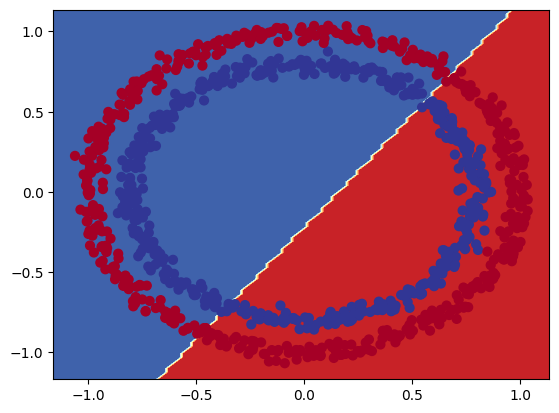

In [22]:
plot_decision_boundary(model_3, X, y)

In [23]:

X_regression=tf.range(0,1000,5)

y_regression=tf.range(100,1100,5)

X_reg_train = X_regression[:150]
X_reg_test = X_regression[150:]

y_reg_train = y_regression[:150]
y_reg_test = y_regression[150:]

In [24]:
tf.random.set_seed(42)
model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(100, input_shape=(None,1)),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])
model_3.compile(loss=tf.keras.losses.mae, optimizer=tf.keras.optimizers.Adam(), metrics=['mae'] )
model_3.fit(tf.expand_dims(X_reg_train, axis=-1), y_reg_train, epochs=100)

Epoch 1/100
5/5 [==============================] - 2s 5ms/step - loss: 263.3221 - mae: 263.3221
Epoch 2/100
5/5 [==============================] - 0s 7ms/step - loss: 257.8068 - mae: 257.8068
Epoch 3/100
5/5 [==============================] - 0s 7ms/step - loss: 260.7486 - mae: 260.7486
Epoch 4/100
5/5 [==============================] - 0s 5ms/step - loss: 254.1791 - mae: 254.1791
Epoch 5/100
5/5 [==============================] - 0s 9ms/step - loss: 255.6903 - mae: 255.6903
Epoch 6/100
5/5 [==============================] - 0s 7ms/step - loss: 257.2659 - mae: 257.2659
Epoch 7/100
5/5 [==============================] - 0s 5ms/step - loss: 253.6161 - mae: 253.6161
Epoch 8/100
5/5 [==============================] - 0s 4ms/step - loss: 252.3269 - mae: 252.3269
Epoch 9/100
5/5 [==============================] - 0s 4ms/step - loss: 258.9274 - mae: 258.9274
Epoch 10/100
5/5 [==============================] - 0s 6ms/step - loss: 256.7917 - mae: 256.7917
Epoch 11/100
5/5 [=====================

In [25]:
y_reg_preds = model_3.predict(tf.expand_dims(X_reg_test, axis=-1))

2/2 [==============================] - 0s 9ms/step


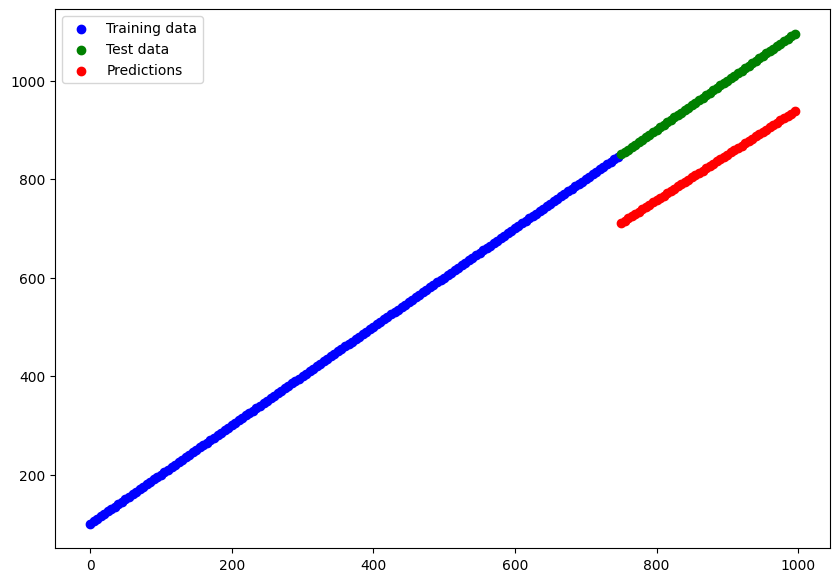

In [26]:
plt.figure(figsize=(10,7))

plt.scatter(X_reg_train, y_reg_train, c='b', label='Training data' )
plt.scatter(X_reg_test, y_reg_test, c='g', label='Test data' )
plt.scatter(X_reg_test, y_reg_preds, c='r', label='Predictions' )
plt.legend();

## Non-linearity

In [27]:
tf.random.set_seed(42)

model_4 = tf.keras.Sequential ([
    tf.keras.layers.Dense(1, activation = 'linear')
])

model_4.compile(loss='binary_crossentropy', optimizer = tf.keras.optimizers.Adam(learning_rate=0.001) , metrics =['accuracy'])
model_4.fit(X,y ,epochs=100)

Epoch 1/100
32/32 [==============================] - 1s 5ms/step - loss: 6.1402 - accuracy: 0.4860
Epoch 2/100
32/32 [==============================] - 0s 6ms/step - loss: 6.1281 - accuracy: 0.4870
Epoch 3/100
32/32 [==============================] - 0s 6ms/step - loss: 6.1076 - accuracy: 0.4860
Epoch 4/100
32/32 [==============================] - 0s 6ms/step - loss: 6.1016 - accuracy: 0.4850
Epoch 5/100
32/32 [==============================] - 0s 4ms/step - loss: 6.0995 - accuracy: 0.4840
Epoch 6/100
32/32 [==============================] - 0s 7ms/step - loss: 6.0815 - accuracy: 0.4840
Epoch 7/100
32/32 [==============================] - 0s 10ms/step - loss: 6.0506 - accuracy: 0.4820
Epoch 8/100
32/32 [==============================] - 0s 7ms/step - loss: 6.0510 - accuracy: 0.4810
Epoch 9/100
32/32 [==============================] - 0s 8ms/step - loss: 6.0481 - accuracy: 0.4810
Epoch 10/100
32/32 [==============================] - 0s 8ms/step - loss: 6.0412 - accuracy: 0.4820
Epoch 11

313/313 [==============================] - 2s 6ms/step


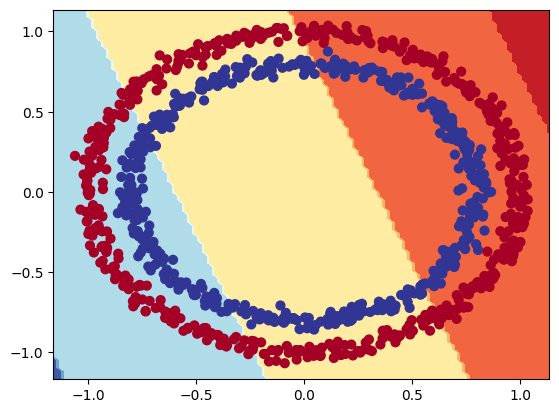

In [28]:
plot_decision_boundary(model_4, X, y)

## Non-linear activiation

In [29]:
tf.random.set_seed(42)
model_5 = tf.keras.Sequential ([
    tf.keras.layers.Dense(1, activation = 'relu')
])

model_5.compile(loss='binary_crossentropy', optimizer = tf.keras.optimizers.Adam(learning_rate=0.001) , metrics =['accuracy'])
history = model_5.fit(X,y ,epochs=100)

Epoch 1/100
32/32 [==============================] - 1s 3ms/step - loss: 5.7940 - accuracy: 0.4860
Epoch 2/100
32/32 [==============================] - 0s 3ms/step - loss: 5.7682 - accuracy: 0.4860
Epoch 3/100
32/32 [==============================] - 0s 3ms/step - loss: 5.7362 - accuracy: 0.4860
Epoch 4/100
32/32 [==============================] - 0s 5ms/step - loss: 5.6878 - accuracy: 0.4840
Epoch 5/100
32/32 [==============================] - 0s 4ms/step - loss: 5.6664 - accuracy: 0.4850
Epoch 6/100
32/32 [==============================] - 0s 4ms/step - loss: 5.6644 - accuracy: 0.4850
Epoch 7/100
32/32 [==============================] - 0s 4ms/step - loss: 5.6624 - accuracy: 0.4850
Epoch 8/100
32/32 [==============================] - 0s 3ms/step - loss: 5.6320 - accuracy: 0.4840
Epoch 9/100
32/32 [==============================] - 0s 3ms/step - loss: 5.6197 - accuracy: 0.4810
Epoch 10/100
32/32 [==============================] - 0s 2ms/step - loss: 5.6138 - accuracy: 0.4810
Epoch 11/

In [30]:
tf.random.set_seed(42)
model_6 = tf.keras.Sequential ([
    tf.keras.layers.Dense(4, activation = 'relu'),
    tf.keras.layers.Dense(4, activation = 'relu'),
    tf.keras.layers.Dense(1, activation = 'sigmoid')
])

model_6.compile(loss='binary_crossentropy', optimizer = tf.keras.optimizers.Adam(learning_rate=0.001) , metrics =['accuracy'])
history = model_6.fit(X,y ,epochs=250)

Epoch 1/250
32/32 [==============================] - 1s 3ms/step - loss: 0.6893 - accuracy: 0.5020
Epoch 2/250
32/32 [==============================] - 0s 3ms/step - loss: 0.6863 - accuracy: 0.5060
Epoch 3/250
32/32 [==============================] - 0s 3ms/step - loss: 0.6845 - accuracy: 0.5090
Epoch 4/250
32/32 [==============================] - 0s 2ms/step - loss: 0.6834 - accuracy: 0.5110
Epoch 5/250
32/32 [==============================] - 0s 3ms/step - loss: 0.6824 - accuracy: 0.5150
Epoch 6/250
32/32 [==============================] - 0s 3ms/step - loss: 0.6816 - accuracy: 0.5130
Epoch 7/250
32/32 [==============================] - 0s 3ms/step - loss: 0.6808 - accuracy: 0.5190
Epoch 8/250
32/32 [==============================] - 0s 2ms/step - loss: 0.6801 - accuracy: 0.5200
Epoch 9/250
32/32 [==============================] - 0s 3ms/step - loss: 0.6795 - accuracy: 0.5210
Epoch 10/250
32/32 [==============================] - 0s 3ms/step - loss: 0.6788 - accuracy: 0.5200
Epoch 11/

In [31]:
model_6.evaluate(X,y)

32/32 [==============================] - 0s 1ms/step - loss: 0.0292 - accuracy: 0.9990


[0.02917250618338585, 0.9990000128746033]

313/313 [==============================] - 1s 1ms/step


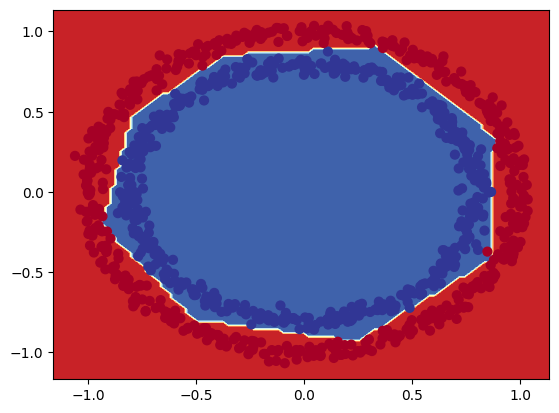

In [32]:
plot_decision_boundary(model_6, X, y)

In [33]:
tf.random.set_seed(42)
model_7 = tf.keras.Sequential ([
    tf.keras.layers.Dense(6, activation = 'relu'),
    tf.keras.layers.Dense(4, activation = 'relu'),
    tf.keras.layers.Dense(1, activation = 'sigmoid')
])

model_7.compile(loss='binary_crossentropy', optimizer = tf.keras.optimizers.Adam(learning_rate=0.001) , metrics =['accuracy'])
history = model_7.fit(X,y ,epochs=100)

Epoch 1/100
32/32 [==============================] - 3s 7ms/step - loss: 0.6943 - accuracy: 0.5030
Epoch 2/100
32/32 [==============================] - 0s 6ms/step - loss: 0.6940 - accuracy: 0.5040
Epoch 3/100
32/32 [==============================] - 0s 5ms/step - loss: 0.6937 - accuracy: 0.4870
Epoch 4/100
32/32 [==============================] - 0s 3ms/step - loss: 0.6935 - accuracy: 0.4970
Epoch 5/100
32/32 [==============================] - 0s 3ms/step - loss: 0.6933 - accuracy: 0.4980
Epoch 6/100
32/32 [==============================] - 0s 3ms/step - loss: 0.6932 - accuracy: 0.4980
Epoch 7/100
32/32 [==============================] - 0s 3ms/step - loss: 0.6929 - accuracy: 0.4960
Epoch 8/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6928 - accuracy: 0.4860
Epoch 9/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6926 - accuracy: 0.4980
Epoch 10/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6925 - accuracy: 0.5010
Epoch 11/

313/313 [==============================] - 0s 1ms/step


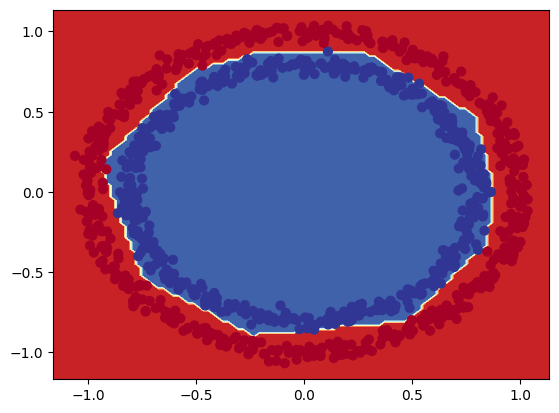

In [34]:
plot_decision_boundary(model_7,X,y)

In [35]:
A= tf.cast(tf.range(-10,10), tf.float32)
A

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([-10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,
         1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.],
      dtype=float32)>

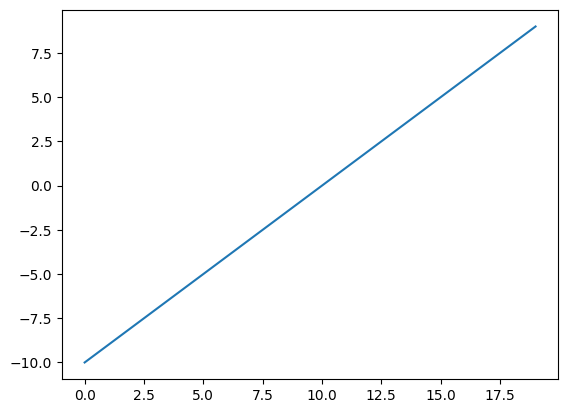

In [36]:
plt.plot(A);

In [37]:
def sigmoid(x):
  return 1 / (1+tf.exp(-x))
  

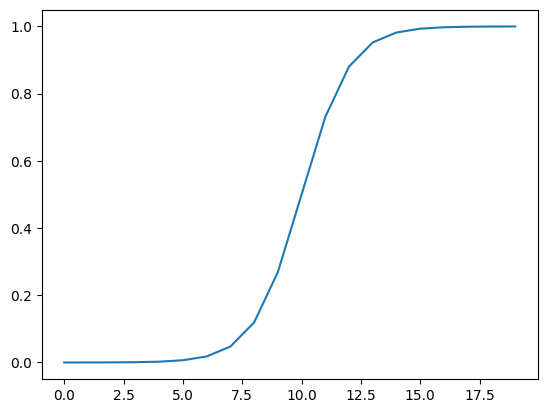

In [38]:
plt.plot(sigmoid(A));

In [39]:
def relu(x):
  return tf.maximum(x,0)

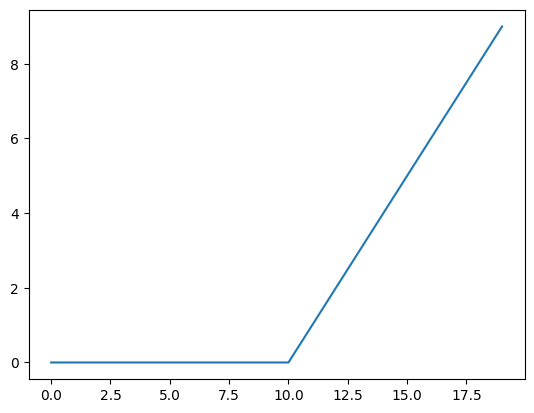

In [40]:
plt.plot(relu(A));

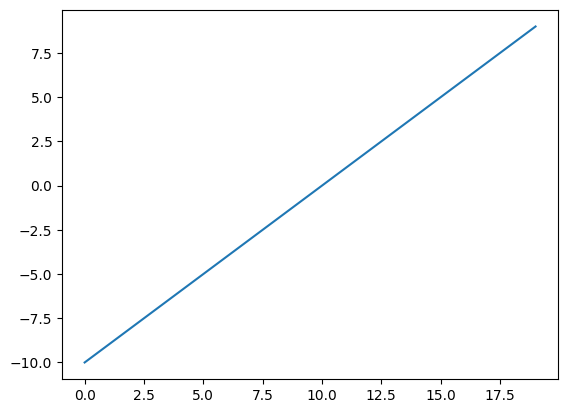

In [41]:
plt.plot(tf.keras.activations.linear(A));

## Evaluating and improving our classfication

In [42]:
len(X)

1000

In [43]:
# Create training and test set

X_train, y_train = X[:800], y[:800]
X_test, y_test = X[800:], y[800:]

In [44]:
X_train.shape,y_train.shape, X_test.shape, y_test.shape 


((800, 2), (800,), (200, 2), (200,))

In [55]:
tf.random.set_seed(42)
model_8 = tf.keras.Sequential ([
    tf.keras.layers.Dense(6, activation = 'relu'),
    tf.keras.layers.Dense(4, activation = 'relu'),
    tf.keras.layers.Dense(1, activation = 'sigmoid')
])

model_8.compile(loss='binary_crossentropy', optimizer = tf.keras.optimizers.Adam(learning_rate=0.01) , metrics =['accuracy'])
history = model_8.fit(X_train,y_train ,epochs=25)

Epoch 1/25
25/25 [==============================] - 1s 2ms/step - loss: 0.6925 - accuracy: 0.4825
Epoch 2/25
25/25 [==============================] - 0s 2ms/step - loss: 0.6897 - accuracy: 0.5213
Epoch 3/25
25/25 [==============================] - 0s 2ms/step - loss: 0.6872 - accuracy: 0.5138
Epoch 4/25
25/25 [==============================] - 0s 2ms/step - loss: 0.6834 - accuracy: 0.5213
Epoch 5/25
25/25 [==============================] - 0s 2ms/step - loss: 0.6773 - accuracy: 0.5512
Epoch 6/25
25/25 [==============================] - 0s 2ms/step - loss: 0.6666 - accuracy: 0.6363
Epoch 7/25
25/25 [==============================] - 0s 2ms/step - loss: 0.6500 - accuracy: 0.6787
Epoch 8/25
25/25 [==============================] - 0s 2ms/step - loss: 0.6145 - accuracy: 0.7063
Epoch 9/25
25/25 [==============================] - 0s 2ms/step - loss: 0.5577 - accuracy: 0.7713
Epoch 10/25
25/25 [==============================] - 0s 2ms/step - loss: 0.5062 - accuracy: 0.8062
Epoch 11/25
25/25 [

313/313 [==============================] - 0s 1ms/step


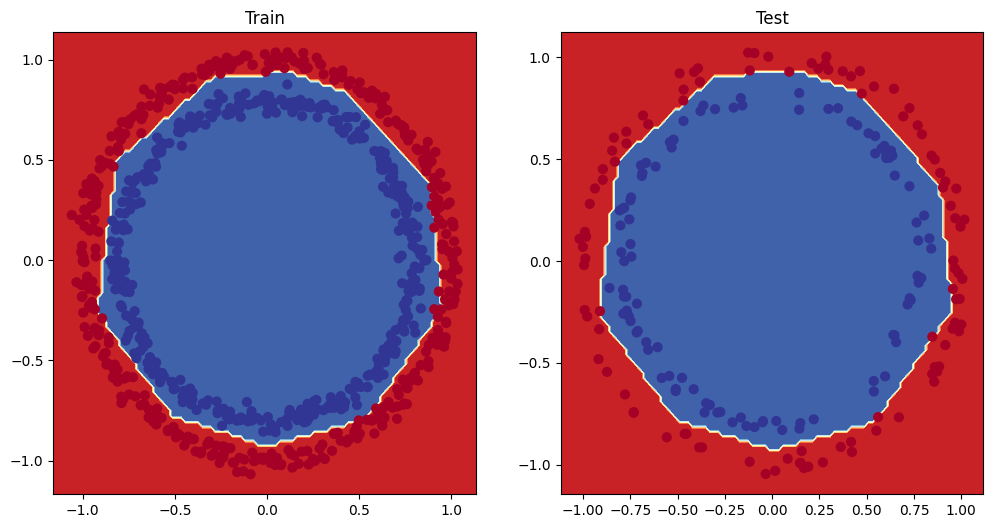

In [56]:
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title("Train")
plot_decision_boundary(model_8, X=X_train, y=y_train)
plt.subplot(1,2,2)
plt.title("Test")
plot_decision_boundary(model_8, X=X_test, y=y_test)
plt.show();

In [57]:
history.history

{'loss': [0.6924861669540405,
  0.6896653175354004,
  0.6872029304504395,
  0.6834209561347961,
  0.6772596836090088,
  0.6665529608726501,
  0.650044322013855,
  0.6144815683364868,
  0.5577074289321899,
  0.5062023401260376,
  0.45278045535087585,
  0.4004967510700226,
  0.33406323194503784,
  0.2812168002128601,
  0.23705314099788666,
  0.1958591490983963,
  0.1646614670753479,
  0.1457606703042984,
  0.13325245678424835,
  0.11523827910423279,
  0.09644807875156403,
  0.08861062675714493,
  0.0773574560880661,
  0.07545652985572815,
  0.07128085196018219],
 'accuracy': [0.48249998688697815,
  0.5212500095367432,
  0.5137500166893005,
  0.5212500095367432,
  0.5512499809265137,
  0.6362500190734863,
  0.6787499785423279,
  0.706250011920929,
  0.7712500095367432,
  0.8062499761581421,
  0.856249988079071,
  0.8700000047683716,
  0.9424999952316284,
  0.9674999713897705,
  0.9775000214576721,
  0.9925000071525574,
  0.9950000047683716,
  0.9937499761581421,
  0.987500011920929,
  0.9

In [58]:
pd.DataFrame(history.history)


,loss,accuracy
0,0.692486,0.48250
1,0.689665,0.52125
2,0.687203,0.51375
3,0.683421,0.52125
4,0.677260,0.55125
5,0.666553,0.63625
6,0.650044,0.67875
7,0.614482,0.70625
8,0.557707,0.77125
9,0.506202,0.80625


Text(0.5, 1.0, 'Model_8 loss curves')

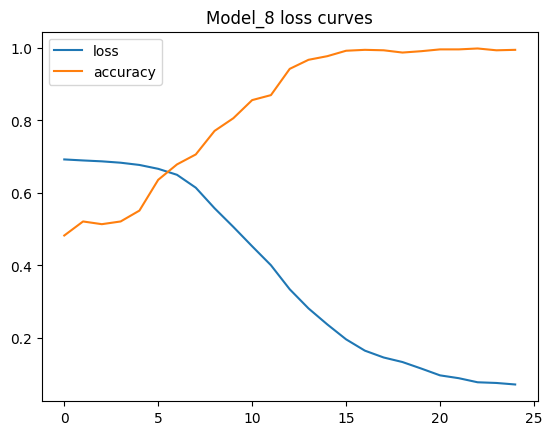

In [59]:
pd.DataFrame(history.history).plot()
plt.title('Model_8 loss curves')

## Optimize learning rate

In [65]:
tf.random.set_seed(42)

model_9 = tf.keras.Sequential ([
    tf.keras.layers.Dense(6, activation = 'relu'),
    tf.keras.layers.Dense(4, activation = 'relu'),
    tf.keras.layers.Dense(1, activation = 'sigmoid')
])

model_9.compile(loss='binary_crossentropy', optimizer = tf.keras.optimizers.Adam() , metrics =['accuracy'])

# Learning rate callback
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-4 * 10**(epoch/20))

history = model_9.fit(X_train,y_train ,epochs=100, callbacks=[lr_scheduler])

Epoch 1/100
25/25 [==============================] - 1s 3ms/step - loss: 0.6945 - accuracy: 0.5175 - lr: 1.0000e-04
Epoch 2/100
25/25 [==============================] - 0s 7ms/step - loss: 0.6942 - accuracy: 0.5163 - lr: 1.1220e-04
Epoch 3/100
25/25 [==============================] - 0s 7ms/step - loss: 0.6939 - accuracy: 0.5163 - lr: 1.2589e-04
Epoch 4/100
25/25 [==============================] - 0s 11ms/step - loss: 0.6936 - accuracy: 0.5150 - lr: 1.4125e-04
Epoch 5/100
25/25 [==============================] - 0s 11ms/step - loss: 0.6932 - accuracy: 0.5138 - lr: 1.5849e-04
Epoch 6/100
25/25 [==============================] - 0s 9ms/step - loss: 0.6930 - accuracy: 0.5150 - lr: 1.7783e-04
Epoch 7/100
25/25 [==============================] - 0s 5ms/step - loss: 0.6925 - accuracy: 0.5163 - lr: 1.9953e-04
Epoch 8/100
25/25 [==============================] - 0s 3ms/step - loss: 0.6921 - accuracy: 0.5163 - lr: 2.2387e-04
Epoch 9/100
25/25 [==============================] - 0s 3ms/step - los

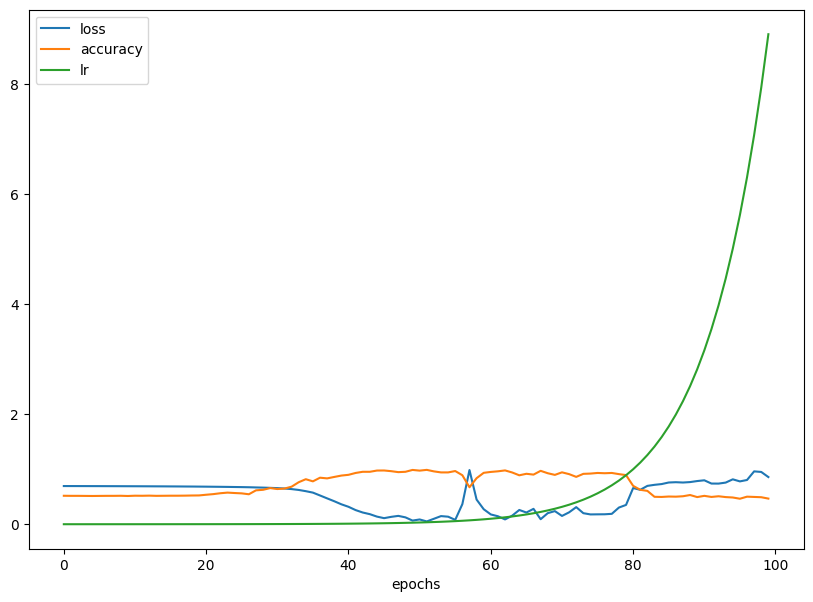

In [66]:
pd.DataFrame(history.history).plot(figsize=(10,7),xlabel='epochs');


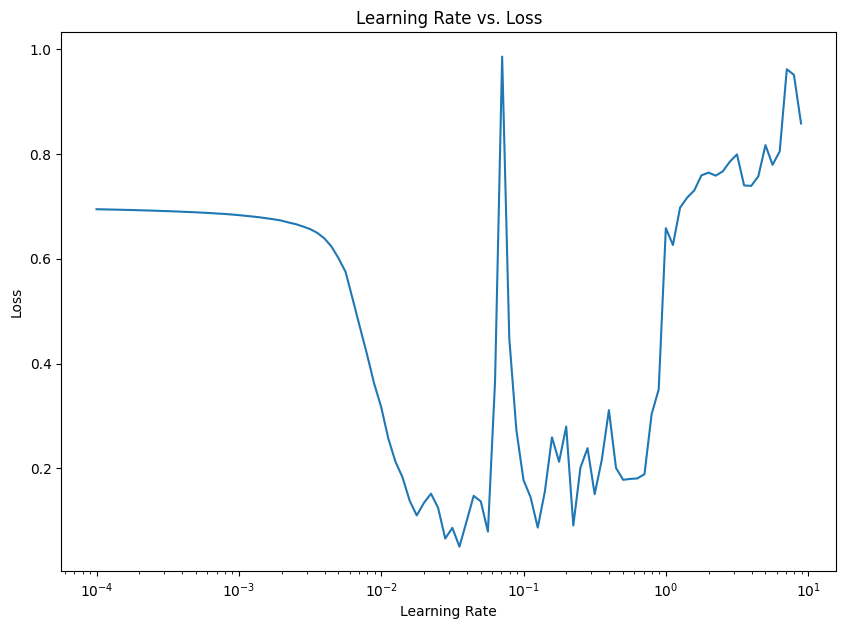

In [70]:
lrs = 1e-4 * (10**(tf.range(100)/20))
plt.figure(figsize=(10,7))
plt.semilogx(lrs,history.history.get('loss'))
plt.xlabel("Learning Rate")
plt.ylabel("Loss")
plt.title('Learning Rate vs. Loss')
plt.show();

In [71]:
tf.random.set_seed(42)

model_10 = tf.keras.Sequential ([
    tf.keras.layers.Dense(6, activation = 'relu'),
    tf.keras.layers.Dense(4, activation = 'relu'),
    tf.keras.layers.Dense(1, activation = 'sigmoid')
])

model_10.compile(loss='binary_crossentropy', optimizer = tf.keras.optimizers.Adam(learning_rate=0.02) , metrics =['accuracy'])


history = model_10.fit(X_train,y_train ,epochs=20)

Epoch 1/20
25/25 [==============================] - 1s 3ms/step - loss: 0.6966 - accuracy: 0.4863
Epoch 2/20
25/25 [==============================] - 0s 3ms/step - loss: 0.6874 - accuracy: 0.5475
Epoch 3/20
25/25 [==============================] - 0s 3ms/step - loss: 0.6703 - accuracy: 0.6125
Epoch 4/20
25/25 [==============================] - 0s 3ms/step - loss: 0.6292 - accuracy: 0.7225
Epoch 5/20
25/25 [==============================] - 0s 3ms/step - loss: 0.5454 - accuracy: 0.7625
Epoch 6/20
25/25 [==============================] - 0s 3ms/step - loss: 0.3977 - accuracy: 0.8950
Epoch 7/20
25/25 [==============================] - 0s 3ms/step - loss: 0.2832 - accuracy: 0.9325
Epoch 8/20
25/25 [==============================] - 0s 3ms/step - loss: 0.1857 - accuracy: 0.9712
Epoch 9/20
25/25 [==============================] - 0s 3ms/step - loss: 0.1259 - accuracy: 0.9925
Epoch 10/20
25/25 [==============================] - 0s 3ms/step - loss: 0.0903 - accuracy: 0.9975
Epoch 11/20
25/25 [

In [72]:
model_10.evaluate(X_test, y_test)

7/7 [==============================] - 0s 8ms/step - loss: 0.0281 - accuracy: 0.9950


[0.028056368231773376, 0.9950000047683716]

313/313 [==============================] - 0s 1ms/step


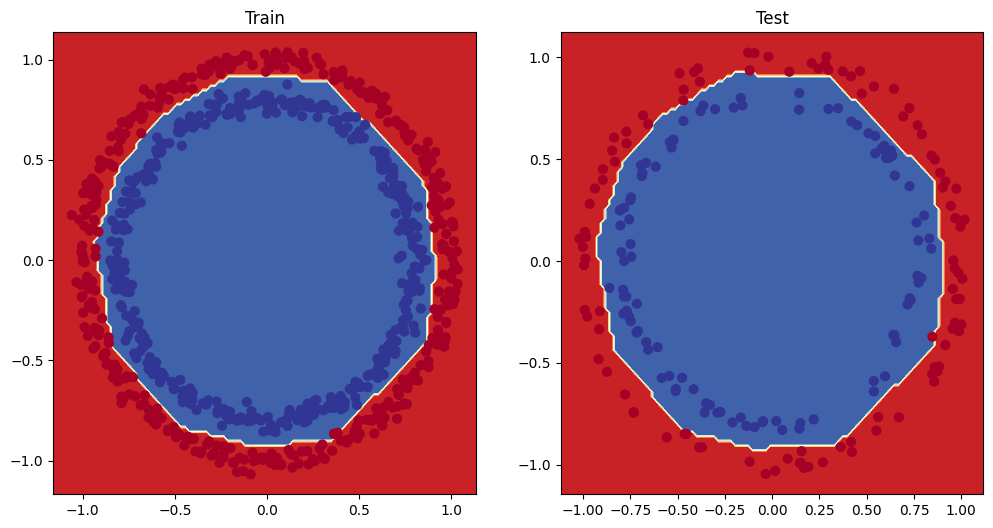

In [76]:
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title('Train')
plot_decision_boundary(model_10, X = X_train, y=y_train)
plt.subplot(1,2,2)
plt.title('Test')
plot_decision_boundary(model_10, X = X_test, y=y_test)
plt.show();

## More classification evaluation methods

In [79]:
loss, accuracy = model_10.evaluate(X_test,y_test)

7/7 [==============================] - 0s 4ms/step - loss: 0.0281 - accuracy: 0.9950


### Confusion matrix

In [83]:
from sklearn.metrics import confusion_matrix

y_preds = model_10.predict(X_test)
y_preds

7/7 [==============================] - 0s 2ms/step


array([[9.86475348e-01],
       [9.99625504e-01],
       [9.90953684e-01],
       [9.99833763e-01],
       [4.57152836e-02],
       [1.73297096e-02],
       [9.81525004e-01],
       [2.54877680e-03],
       [9.99397695e-01],
       [4.80552465e-02],
       [9.97375309e-01],
       [3.35183263e-01],
       [9.96685624e-01],
       [9.97197151e-01],
       [9.99909341e-01],
       [9.99927521e-01],
       [9.51204777e-01],
       [9.95262623e-01],
       [2.45925151e-02],
       [9.82175827e-01],
       [1.27148703e-02],
       [9.99662220e-01],
       [9.86083090e-01],
       [9.95311439e-01],
       [1.93070471e-02],
       [9.25543904e-01],
       [9.99535859e-01],
       [7.82978609e-02],
       [1.28583936e-03],
       [9.99917984e-01],
       [4.61266469e-03],
       [9.99691963e-01],
       [9.99897659e-01],
       [3.43242148e-03],
       [2.86962185e-02],
       [9.99840319e-01],
       [9.98610616e-01],
       [9.14164543e-01],
       [9.99971628e-01],
       [9.99846816e-01],


In [84]:
tf.round(y_preds)

<tf.Tensor: shape=(200, 1), dtype=float32, numpy=
array([[1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.],
       [1.],
       [1.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
 

In [86]:
confusion_matrix(y_test, tf.round(y_preds))

array([[100,   1],
       [  0,  99]])

In [97]:
import itertools

figsize=(10,10)

cm = confusion_matrix(y_test, tf.round(y_preds))

cm_norm = cm.astype('float')/cm.sum(axis=1)[:, np.newaxis]
cm_norm

array([[0.99009901, 0.00990099],
       [0.        , 1.        ]])

In [98]:
cm.shape
n_classes = cm.shape[0]

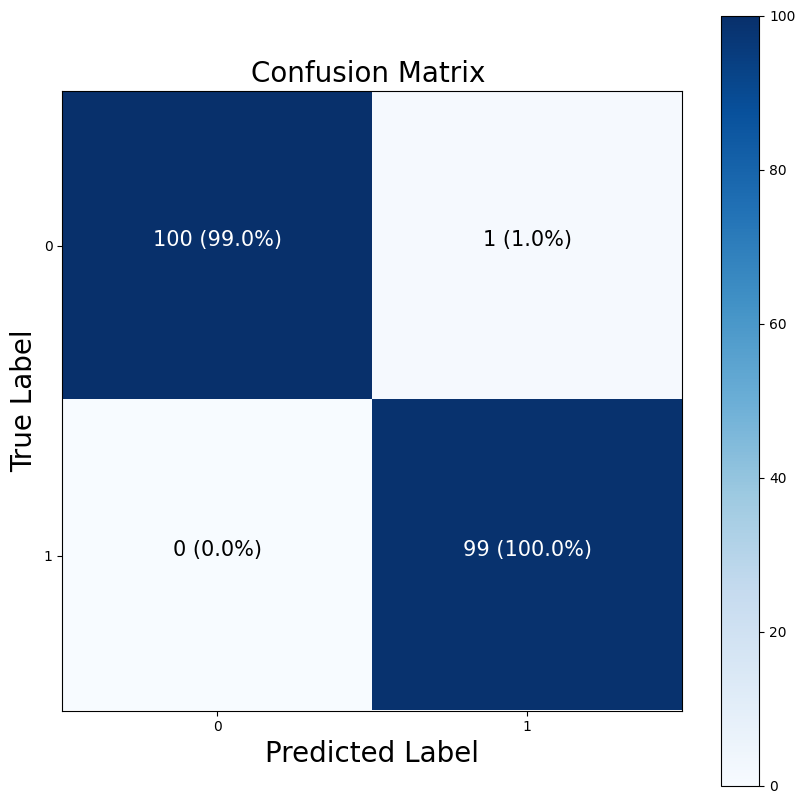

In [101]:
fig, ax =plt.subplots(figsize=figsize)

cax= ax.matshow(cm, cmap=plt.cm.Blues)
fig.colorbar(cax)

classes = False
if classes:
  labels= classes
else:
  labels = np.arange(cm.shape[0])

ax.set(title="Confusion Matrix ",
       xlabel="Predicted Label",
       ylabel="True Label",
       xticks=np.arange(n_classes),
       yticks=np.arange(n_classes),
       xticklabels=labels,
       yticklabels=labels)

ax.xaxis.set_label_position('bottom')
ax.xaxis.tick_bottom()

ax.yaxis.label.set_size(20)
ax.xaxis.label.set_size(20)
ax.title.set_size(20)


threshold = (cm.max()+cm.min())/2

for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
  plt.text(j,i, f'{cm[i,j]} ({cm_norm[i,j]*100:.1f}%)',horizontalalignment='center', color = 'white' if cm[i,j] > threshold else 'black', size = 15 )

## Mutli-class classification

